# Projective geometry and image creation with intrinsics and extrinsics

This is going to be a refresher for me about the projection of 3D points to an image plane.

We will use camera intrinsics and extrinsics, which a grasp of the concept is needed and you should have a look about it [here](https://ksimek.github.io/2013/08/13/intrinsic/)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Enable interactive mode
plt.ion()

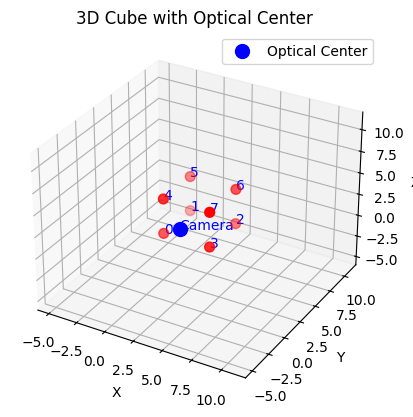

In [3]:
# Let's create a cube in the 3D space
points = (np.array([[0, 0, 0],
                     [0, 1, 0],
                     [1, 1, 0],
                     [1, 0, 0],
                     [0, 0, 1],
                     [0, 1, 1],
                     [1, 1, 1],
                     [1, 0, 1]]) * 4) + 1

rotation_xyz = np.array([0, 0, 0])
translation = np.array([-3, 0, -3])

extrinsic = np.array([[1, 0, 0, translation[0]],
                      [0, 1, 0, translation[1]],
                      [0, 0, 1, translation[2]],
                      [0, 0, 0, 1]])

intrinsic = np.array([[100, 0, 50],
                        [0, 100, 50],
                        [0, 0, 1]])

# Plot the cube in 3D
def plot_3d_cube_general(points):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], color='r', s=50)
    for i, p in enumerate(points):
        ax.text(p[0], p[1], p[2], f'{i}', color='blue')
    
    # Plot the optical center of the camera
    optical_center = -np.linalg.inv(extrinsic[:3, :3]) @ extrinsic[:3, 3]
    ax.scatter(optical_center[0], optical_center[1], optical_center[2], color='b', s=100, label='Optical Center')
    ax.text(optical_center[0], optical_center[1], optical_center[2], 'Camera', color='blue')
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('3D Cube with Optical Center')
    ax.legend()

    # Set equal aspect ratio
    ax.set_xlim([-6, 12])
    ax.set_ylim([-6, 12])
    ax.set_zlim([-6, 12])    

    plt.show()

plot_3d_cube_general(points)

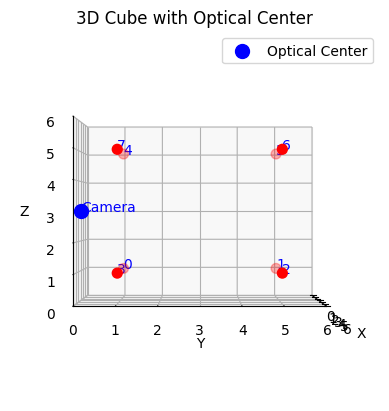

In [4]:
# Plot the cube in 3D
def plot_3d_cube(points):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], color='r', s=50)
    for i, p in enumerate(points):
        ax.text(p[0], p[1], p[2], f'{i}', color='blue')
    
    # Plot the optical center of the camera
    optical_center = -np.linalg.inv(extrinsic[:3, :3]) @ extrinsic[:3, 3]
    ax.scatter(optical_center[0], optical_center[1], optical_center[2], color='b', s=100, label='Optical Center')
    ax.text(optical_center[0], optical_center[1], optical_center[2], 'Camera', color='blue')
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('3D Cube with Optical Center')
    ax.legend()

    # Set equal aspect ratio
    ax.set_xlim([0, 6])
    ax.set_ylim([0, 6])
    ax.set_zlim([0, 6])

    # Set camera position and direction
    ax.view_init(elev=0, azim=0)  # Adjust elevation and azimuth for desired camera angle

    plt.show()

plot_3d_cube(points)


[1 1 1]
[[1. 1. 1. 1.]
 [1. 5. 1. 1.]
 [5. 5. 1. 1.]
 [5. 1. 1. 1.]
 [1. 1. 5. 1.]
 [1. 5. 5. 1.]
 [5. 5. 5. 1.]
 [5. 1. 5. 1.]]
[[-2.  1. -2.  1.]
 [-2.  5. -2.  1.]
 [ 2.  5. -2.  1.]
 [ 2.  1. -2.  1.]
 [-2.  1.  2.  1.]
 [-2.  5.  2.  1.]
 [ 2.  5.  2.  1.]
 [ 2.  1.  2.  1.]]
[[ 150.   -0.]
 [ 150. -200.]
 [ -50. -200.]
 [ -50.   -0.]
 [ -50.  100.]
 [ -50.  300.]
 [ 150.  300.]
 [ 150.  100.]]


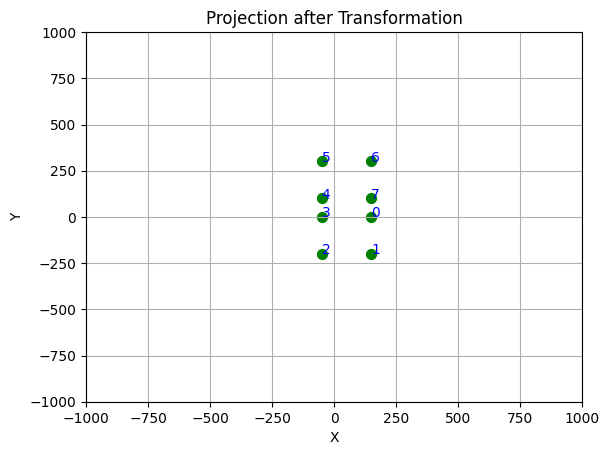

In [5]:
# Apply extrinsic and intrinsic matrices using homogeneous coordinates
def apply_transformations(points):
    # Convert to homogeneous coordinates
    homogeneous_points = np.hstack((points, np.ones((points.shape[0], 1))))
    print(homogeneous_points)
    
    # Apply extrinsic transformation
    transformed_points = homogeneous_points @ extrinsic.T
    print(transformed_points)
    
    # Project using intrinsic matrix
    projected_points = transformed_points[:, :3] @ intrinsic.T
    
    # Normalize to get 2D points
    normalized_points = projected_points[:, :2] / projected_points[:, 2][:, np.newaxis]
    return normalized_points

# Plot the 2D projection
def plot_2d_projection(points):
    fig, ax = plt.subplots()
    ax.scatter(points[:, 0], points[:, 1], color='g', s=50)
    for i, p in enumerate(points):
        ax.text(p[0], p[1], f'{i}', color='blue')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Projection after Transformation')

    ax.set_xlim([-1000, 1000])
    ax.set_ylim([-1000, 1000])
    plt.grid()
    plt.show()

print(points[0])
transformed_points = apply_transformations(points[:8])
print(transformed_points)
plot_2d_projection(transformed_points)

In [6]:
def plot_3d_with_bounds(data):
    """
    Creates a 3D plot of the points and dynamically sets boundaries based on the mean, max, and min values.
    
    Parameters:
    - data: A NumPy array of shape (N, 3), where each row is a point [x, y, z].
    """
    # Ensure the input data has the correct shape
    if data.shape[1] != 3:
        raise ValueError("Input data must have shape (N, 3) for 3D plotting.")
    
    # Extract x, y, z values
    x, y, z = data[:, 0], data[:, 1], data[:, 2]
    
    # Calculate min, max, and mean for each direction
    x_min, x_max, x_mean = x.min(), x.max(), x.mean()
    y_min, y_max, y_mean = y.min(), y.max(), y.mean()
    z_min, z_max, z_mean = z.min(), z.max(), z.mean()
    
    # Create the 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Scatter plot of the points
    ax.scatter(x, y, z, c='b', marker='o', label='Data Points')
    
    # Set the boundaries
    ax.set_xlim([x_min, x_max])
    ax.set_ylim([y_min, y_max])
    ax.set_zlim([z_min, z_max])
    
    # Optionally, mark the mean point
    ax.scatter(x_mean, y_mean, z_mean, c='r', marker='x', s=100, label='Mean Point')
    
    # Add labels and legend
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    ax.legend()
    
    # Show the plot
    plt.show()

(65536, 3)


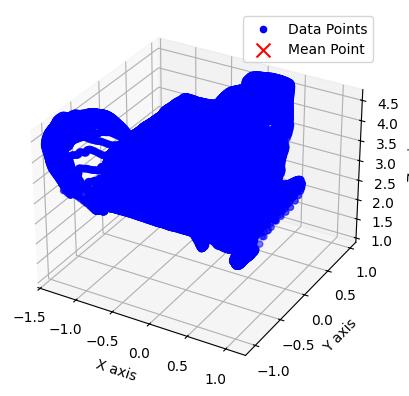

In [7]:
from numpy import load
data = load('test.npy', allow_pickle=True)
dictionary = data.item()  # Extracts the single item from a 0D array
pts3d = dictionary['pts3d']
print(pts3d[0,:,:,:].reshape(-1, 3).shape)

plot_3d_with_bounds(pts3d[0,:,:,:].reshape(-1, 3))


In [8]:
dictionary

{'gt': array([[[[-1.15533210e-01, -1.15504988e-01,  2.23529413e-01],
          [ 1.17560104e-01, -1.17531396e-01,  2.27450982e-01],
          [ 3.58761013e-01, -1.19557798e-01,  2.31372550e-01],
          ...,
          [ 1.84245071e+01, -3.64752635e-02,  7.05882385e-02],
          [ 2.77462120e+01, -5.47128953e-02,  1.05882354e-01],
          [ 2.78556652e+01, -5.47128953e-02,  1.05882354e-01]],
 
         [[-1.15533210e-01,  1.15504988e-01,  2.23529413e-01],
          [ 1.17560104e-01,  1.17531396e-01,  2.27450982e-01],
          [ 3.58761013e-01,  1.19557798e-01,  2.31372550e-01],
          ...,
          [ 1.84245071e+01,  3.64752561e-02,  7.05882385e-02],
          [ 2.77462120e+01,  5.47128879e-02,  1.05882354e-01],
          [ 2.78556652e+01,  5.47128879e-02,  1.05882354e-01]],
 
         [[-1.15533210e-01,  3.46514970e-01,  2.23529413e-01],
          [ 1.17560104e-01,  3.52594167e-01,  2.27450982e-01],
          [ 3.58761013e-01,  3.58673394e-01,  2.31372550e-01],
          ...

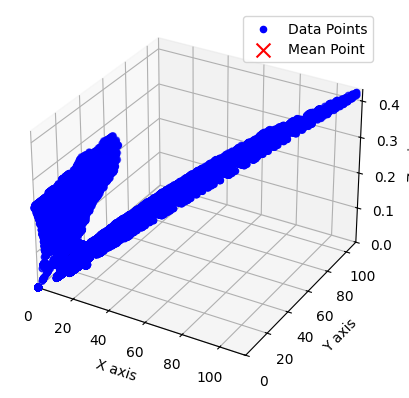

In [110]:
gt = dictionary['gt']
plot_3d_with_bounds(gt[0,:,:,:].reshape(-1, 3))